In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## The Accept-Reject Method

The implementation of **Corollary 17** is formalized in the **Accept-Reject Algorithm**. This method generates random samples from a target density $ f(x) $, using a simpler instrumental density $ g(x) $ and a bounding constant $ M $.

---

### Algorithm A.4 - Accept-Reject Method

1. **Generate**:
   - $ X \sim g(x) $, where $ g(x) $ is the instrumental density.
   - $ U \sim \text{Uniform}(0, 1) $.

2. **Accept or Reject**:
   - Accept $ Y = X $ if:
     $$
     U \leq \frac{f(X)}{M g(X)},
     $$
     where $ M $ is a constant such that $ f(x) \leq M g(x) $ for all $ x $.
   - Otherwise, return to Step 1.

3. **Output**:
   - The accepted sample $ Y $.

---

### Properties of the Accept-Reject Method

1. **Acceptance Probability**:
   The probability of acceptance is:
   $$
   P(\text{Accept}) = \frac{1}{M}.
   $$
   The expected number of trials until acceptance is $ M $.

2. **Efficiency**:
   The efficiency of the algorithm depends on the choice of $ g(x) $ and $ M $. A smaller $ M $ increases the acceptance rate.

3. **Instrumental Density**:
   - $ g(x) $ must have **tails at least as heavy as** $ f(x) $, ensuring $ f(x)/g(x) $ is bounded.
   - For instance, $ g(x) $ cannot be a normal distribution if $ f(x) $ is Cauchy, but the reverse is possible.

4. **Optimization**:
   - To improve efficiency, select $ g(x) $ from a parametric family and minimize $ M $.
   - Computational cost of sampling from $ g(x) $ also impacts efficiency.

---

### Example Implementation in Python
The following implementation demonstrates the Accept-Reject algorithm.



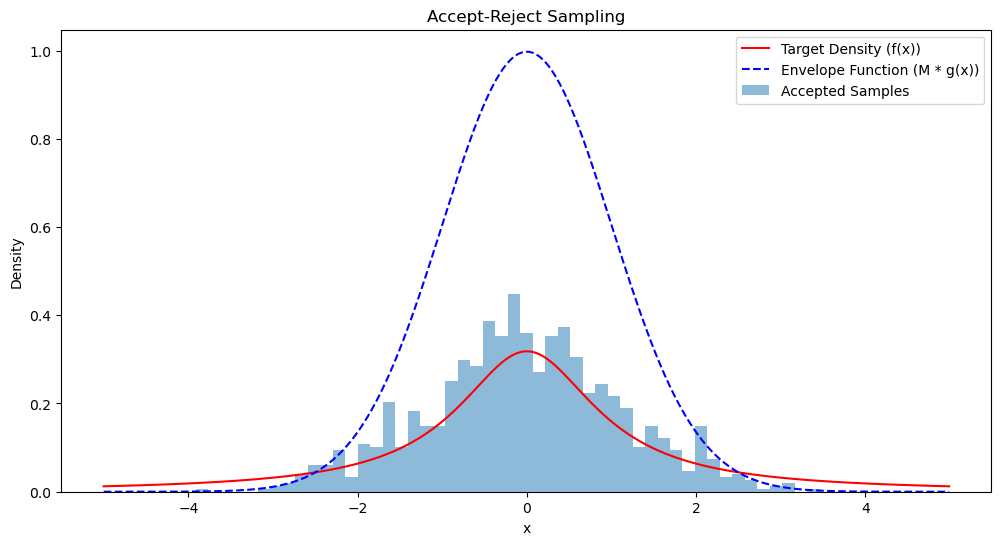

In [1]:
#```python
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import cauchy, norm

# Define target density f(x) (e.g., Cauchy)
def target_density(x):
    return cauchy.pdf(x)

# Define instrumental density g(x) (e.g., Normal)
def instrumental_density(x):
    return norm.pdf(x)

# Define constant M
M = 2.5  # Chosen to satisfy f(x) <= M * g(x) for all x

# Accept-Reject Sampling
def accept_reject_sampling(size):
    samples = []
    while len(samples) < size:
        # Generate X ~ g(x)
        x = random.gauss(0, 1)  # Normal distribution
        
        # Generate U ~ U(0, 1)
        u = random.uniform(0, 1)
        
        # Accept if U <= f(X) / (M * g(X))
        if u <= target_density(x) / (M * instrumental_density(x)):
            samples.append(x)
    return samples

# Generate samples
num_samples = 1000
samples = accept_reject_sampling(num_samples)

# Plotting the results
x_vals = [i / 100 for i in range(-500, 500)]
f_vals = [target_density(x) for x in x_vals]
g_vals = [M * instrumental_density(x) for x in x_vals]

plt.figure(figsize=(12, 6))
plt.plot(x_vals, f_vals, 'r-', label="Target Density (f(x))")
plt.plot(x_vals, g_vals, 'b--', label="Envelope Function (M * g(x))")
plt.hist(samples, bins=50, density=True, alpha=0.5, label="Accepted Samples")
plt.title("Accept-Reject Sampling")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


## Accept-Reject Algorithm for Normal and Gamma Distributions

### Example : Generating $ \mathcal{N}(0, 1) $ from Double Exponentials
The Accept-Reject algorithm can generate standard normal random variables $ \mathcal{N}(0, 1) $ using the double-exponential (Laplace) distribution as the instrumental density.

#### Instrumental Density
The Laplace distribution is defined as:
$$
g(x) = \frac{a}{2} e^{-a|x|}.
$$

#### Ratio of Densities
The ratio $ \frac{f(x)}{g(x)} $, where $ f(x) $ is the standard normal density, simplifies to:
$$
\frac{f(x)}{g(x)} = \sqrt{\frac{2}{\pi}} e^{x^2 / 2 - a|x|}.
$$

#### Optimization
The minimum value of $ M $ is achieved when $ a = 1 $. In this case:
$$
M = \sqrt{2e / \pi}.
$$
The acceptance probability becomes:
$$
P(\text{Accept}) = \frac{1}{M} = \sqrt{\frac{\pi}{2e}} \approx 0.76.
$$

#### Efficiency
On average, $ \frac{1}{0.76} \approx 1.3 $ trials are required to generate a single normal random variable. This is slightly less efficient than the **Box-Muller algorithm**, which uses a single uniform random variable.

---

### Example 19: Gamma Distribution $ \text{Gamma}(\alpha, \beta) $
For $ \alpha \in \mathbb{N} $, the Gamma distribution can be represented as the sum of $ \alpha $ exponential random variables:
$$
X = \sum_{i=1}^\alpha -\frac{\ln(U_i)}{\beta}, \quad U_i \sim \text{Uniform}(0, 1).
$$
For non-integer $ \alpha $, this representation does not hold, and the Accept-Reject algorithm provides a viable approach.

#### Instrumental Density
Use a Gamma distribution $ \text{Gamma}(\lfloor \alpha \rfloor, 1) $, where $ \lfloor \alpha \rfloor $ is the greatest integer less than or equal to $ \alpha $.

#### Ratio of Densities
The ratio $ \frac{f(x)}{g(x)} $ simplifies to:
$$
\frac{f(x)}{g(x)} \propto x^{\alpha - \lfloor \alpha \rfloor} e^{-(1-\beta)x}.
$$
The optimal bound is achieved for $ \beta = \frac{\lfloor \alpha \rfloor}{\alpha} $, which minimizes $ M $.

---

### Algorithm for Gamma Distribution
1. **Generate**:
   - $ X \sim \text{Gamma}(\lfloor \alpha \rfloor, 1) $.
   - $ U \sim \text{Uniform}(0, 1) $.

2. **Accept or Reject**:
   - Accept $ Y = X $ if:
     $$
     U \leq \frac{f(X)}{M g(X)},
     $$
     where $ f(x) $ is the Gamma density with parameters $ \alpha, 1 $, and $ g(x) $ is the Gamma density with parameters $ \lfloor \alpha \rfloor, 1 $.

3. **Repeat** until an accepted value is found.

---

### Example 20: Truncated Normal Distribution
Truncated normal distributions are encountered when constraints $ x \geq a $ modify the normal density:
$$
f(x | x \geq a) \propto \exp\left(-\frac{x^2}{2}\right), \quad x \geq a.
$$

#### Instrumental Density
Use a standard normal distribution $ \mathcal{N}(0, 1) $ or a shifted normal distribution truncated at $ a $.

#### Optimization
The Accept-Reject algorithm is used with a suitable $ M $ ensuring $ f(x) \leq M g(x) $. Computational efficiency depends on choosing $ g(x) $ with support and tails matching the truncated region.

---

### Implementation in Python
#### Gamma Distribution Example


In [3]:
#```python
import random
import math

# Gamma density function
def gamma_density(x, alpha, beta):
    if x < 0:
        return 0
    return (beta**alpha * x**(alpha-1) * math.exp(-beta*x)) / math.gamma(alpha)

# Accept-Reject sampling for Gamma distribution
def gamma_accept_reject(alpha, beta, size):
    samples = []
    instrumental_alpha = math.floor(alpha)
    M = math.exp(instrumental_alpha - alpha) * (alpha / instrumental_alpha)**(alpha - instrumental_alpha)
    
    while len(samples) < size:
        # Generate from instrumental Gamma
        x = sum(-math.log(random.uniform(0, 1)) for _ in range(instrumental_alpha))
        u = random.uniform(0, 1)
        
        # Accept or reject
        if u <= gamma_density(x, alpha, beta) / (M * gamma_density(x, instrumental_alpha, beta)):
            samples.append(x)
    return samples


In [4]:
# Truncated normal density
def truncated_normal_density(x, a):
    if x < a:
        return 0
    Z = 0.5 * (1 + math.erf(a / math.sqrt(2)))  # Normalizing constant
    return math.exp(-x**2 / 2) / Z

# Accept-Reject for truncated normal
def truncated_normal_accept_reject(a, size):
    samples = []
    while len(samples) < size:
        x = random.gauss(0, 1)  # Normal distribution
        if x >= a:
            samples.append(x)
    return samples


In [5]:
import random
import math

# Function to generate samples from a Gamma distribution using Accept-Reject
def gamma_accept_reject(alpha, beta, num_samples):
    samples = []
    M = (alpha - 1) ** (alpha - 1) * math.exp(-alpha + 1) / math.gamma(alpha)  # Compute bound
    while len(samples) < num_samples:
        Y = random.expovariate(beta)  # Simulate from Exp(beta)
        U = random.uniform(0, 1)
        if U <= (Y ** (alpha - 1) * math.exp(-Y) / M):
            samples.append(Y)
    return samples

# Function to generate samples from a truncated normal distribution using Accept-Reject
def truncated_normal(a, num_samples):
    samples = []
    while len(samples) < num_samples:
        Y = random.gauss(0, 1)  # Generate from N(0,1)
        if Y >= a:  # Accept if above the truncation threshold
            samples.append(Y)
    return samples

# Parameters for the Gamma distribution
alpha = 2.5  # Shape parameter
beta = 1.0   # Rate parameter
num_samples = 10

# Generate Gamma samples
gamma_samples = gamma_accept_reject(alpha, beta, num_samples)

# Parameters for the Truncated Normal distribution
a = 0.5  # Truncation threshold

# Generate Truncated Normal samples
truncated_normal_samples = truncated_normal(a, num_samples)

# Print results
print("Gamma Distribution Samples (α=2.5, β=1):")
print(gamma_samples)

print("\nTruncated Normal Distribution Samples (a=0.5):")
print(truncated_normal_samples)


Gamma Distribution Samples (α=2.5, β=1):
[0.95490036497805, 0.7397522598360637, 0.27163732759534126, 1.8311969889237838, 0.8086805743626247, 0.8686932026465138, 1.6599723343177706, 1.3325305402742362, 0.20645262284969645, 0.178878055076782]

Truncated Normal Distribution Samples (a=0.5):
[0.5917034609514018, 0.6564582685325737, 1.6412455195490945, 0.6346839493999463, 1.5711421057227324, 2.1120982982796175, 0.7953025268845231, 1.8019989359567843, 2.008639882721804, 0.8784732223814475]


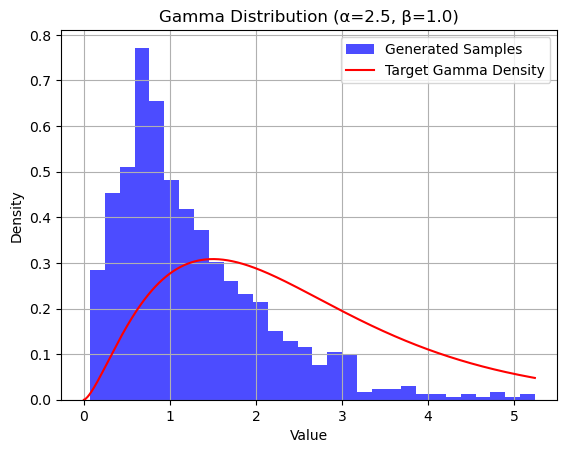

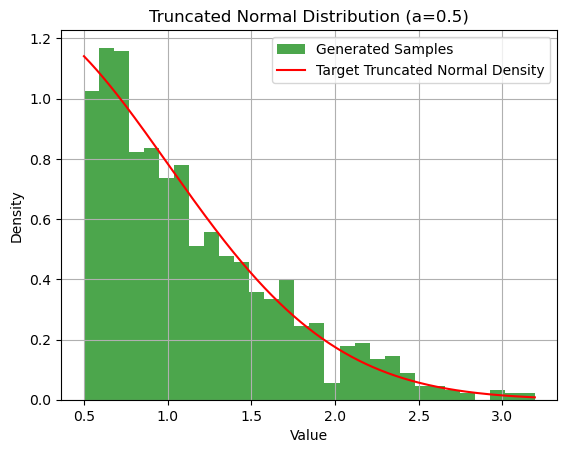

In [6]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Function to generate samples from a Gamma distribution using Accept-Reject
def gamma_accept_reject(alpha, beta, num_samples):
    samples = []
    M = (alpha - 1) ** (alpha - 1) * math.exp(-alpha + 1) / math.gamma(alpha)  # Compute bound
    while len(samples) < num_samples:
        Y = random.expovariate(beta)  # Simulate from Exp(beta)
        U = random.uniform(0, 1)
        if U <= (Y ** (alpha - 1) * math.exp(-Y) / M):
            samples.append(Y)
    return samples

# Function to generate samples from a truncated normal distribution using Accept-Reject
def truncated_normal(a, num_samples):
    samples = []
    while len(samples) < num_samples:
        Y = random.gauss(0, 1)  # Generate from N(0,1)
        if Y >= a:  # Accept if above the truncation threshold
            samples.append(Y)
    return samples

# Plotting functions
def plot_gamma(samples, alpha, beta):
    # Histogram of samples
    plt.hist(samples, bins=30, density=True, alpha=0.7, color='blue', label='Generated Samples')
    
    # Target Gamma density
    x = np.linspace(0, max(samples), 500)
    gamma_density = (x ** (alpha - 1) * np.exp(-x)) / math.gamma(alpha)
    plt.plot(x, gamma_density, 'r-', label='Target Gamma Density')
    
    plt.title(f"Gamma Distribution (α={alpha}, β={beta})")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_truncated_normal(samples, a):
    # Histogram of samples
    plt.hist(samples, bins=30, density=True, alpha=0.7, color='green', label='Generated Samples')
    
    # Target Truncated Normal density
    x = np.linspace(a, max(samples), 500)
    normal_density = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x ** 2)
    truncated_normal_density = normal_density / (1 - 0.5 * (1 + math.erf(a / np.sqrt(2))))
    plt.plot(x, truncated_normal_density, 'r-', label='Target Truncated Normal Density')
    
    plt.title(f"Truncated Normal Distribution (a={a})")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
alpha = 2.5  # Shape parameter for Gamma
beta = 1.0   # Rate parameter for Gamma
a = 0.5      # Truncation threshold for Truncated Normal
num_samples = 1000

# Generate samples
gamma_samples = gamma_accept_reject(alpha, beta, num_samples)
truncated_normal_samples = truncated_normal(a, num_samples)

# Plot the results
plot_gamma(gamma_samples, alpha, beta)
plot_truncated_normal(truncated_normal_samples, a)


## Envelope Accept-Reject Methods
### The Squeeze Principle

In numerous settings, the distribution associated with the density $ f(x) $ is challenging to simulate due to the complexity of $ f(x) $, which may require substantial computational effort for evaluation. For instance, in the setup of Example 1.9, adopting a Bayesian approach with a posterior distribution given by:

$$
\pi(\theta | \mathcal{D}) \propto f(\mathcal{D} | \theta) \pi(\theta),
$$

where $ f(\mathcal{D} | \theta) $ is the likelihood function and $ \pi(\theta) $ is the prior distribution, can lead to significant computational challenges.

### Translating to the Truncated Normal Case

For a truncated normal distribution, the naïve method involves sampling from a standard normal $ \mathcal{N}(\mu, \sigma^2) $ until the generated value exceeds a given threshold $ a $. This method is computationally expensive, requiring on average:

$$
\frac{1}{1 - \Phi\left(\frac{a - \mu}{\sigma}\right)}
$$

samples from $ \mathcal{N}(\mu, \sigma^2) $ for one acceptance, where $ \Phi $ is the CDF of the standard normal distribution.

#### A More Efficient Approach: Translated Exponential Distribution
To improve efficiency, we consider using the translated exponential distribution $ \text{Exp}(\alpha, \mu) $ as an instrumental distribution. Its density is:

$$
g_\alpha(z) = \alpha e^{-\alpha (z - \mu)}, \quad z \geq \mu.
$$

The ratio \( \frac{f(z)}{g_\alpha(z)} \) is given by:

$$
\frac{f(z)}{g_\alpha(z)} = e^{\alpha (z - \mu)} e^{-z^2 / 2}.
$$

This ratio is bounded by:

$$
\exp\left(\frac{\alpha^2}{2} - \alpha \mu\right), \quad \text{if } \alpha > \mu,
$$

and by:

$$
\exp\left(-\frac{\mu^2}{2}\right), \quad \text{otherwise.}
$$

The optimal choice of $ \alpha $ minimizes these bounds. For $ \alpha > \mu $, the bound is minimized by:

$$
\alpha = \mu + \sqrt{\mu^2 + 4}.
$$

### Algorithm A.5: Optimized Truncated Normal Sampling
1. **Generate** $ Y \sim \text{Exp}(\alpha, \mu) $.
2. **Generate** $ U \sim \text{Uniform}(0, 1) $.
3. **Accept** $ Y $ if:

   $
   U \leq \frac{e^{-Y^2 / 2}}{\exp\left(\frac{\alpha^2}{2} - \alpha \mu\right)}.
   $

4. **Repeat** until a sample is accepted.

### Discussion
This algorithm avoids the inefficiencies of the naïve approach, achieving higher acceptance probabilities and reducing computational overhead. Future methods, such as importance sampling (Chapter 3), may further address the issue of rejected samples.


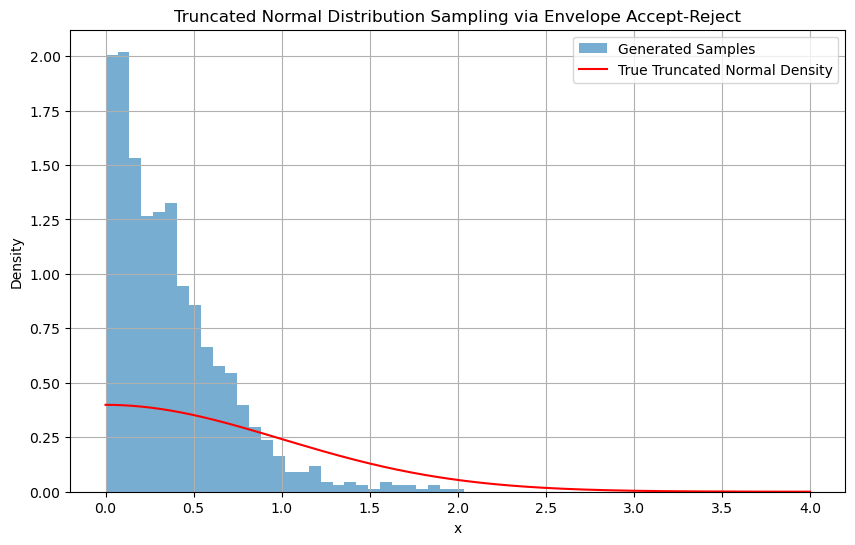

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the truncated normal density function
def truncated_normal_density(x, mu=0, sigma=1):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

# Define the translated exponential density function
def translated_exponential_density(x, alpha, mu=0):
    return alpha * np.exp(-alpha * (x - mu)) * (x >= mu)

# Optimized alpha for the translated exponential
def optimized_alpha(mu):
    return mu + np.sqrt(mu**2 + 4)

# Accept-Reject Algorithm
def truncated_normal_sample(mu=0, sigma=1, a=0, n_samples=1000):
    alpha = optimized_alpha(mu)
    samples = []
    M = np.exp(alpha**2 / 2 - alpha * mu)  # Bound for acceptance
    while len(samples) < n_samples:
        # Generate Y ~ Exp(alpha, mu)
        Y = mu + np.random.exponential(1 / alpha)
        # Generate U ~ Uniform(0, 1)
        U = np.random.uniform()
        # Check acceptance criterion
        if U <= np.exp(-Y**2 / 2) / M:
            samples.append(Y)
    return np.array(samples)

# Parameters for the truncated normal
mu = 0  # Mean
sigma = 1  # Standard deviation
a = 0  # Truncation point
n_samples = 1000  # Number of samples

# Generate samples
samples = truncated_normal_sample(mu=mu, sigma=sigma, a=a, n_samples=n_samples)

# Plot results
x = np.linspace(a, mu + 4 * sigma, 1000)
true_density = norm.pdf(x, loc=mu, scale=sigma) * (x >= a)
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, label="Generated Samples")
plt.plot(x, true_density, label="True Truncated Normal Density", color="red")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Truncated Normal Distribution Sampling via Envelope Accept-Reject")
plt.legend()
plt.grid()
plt.show()


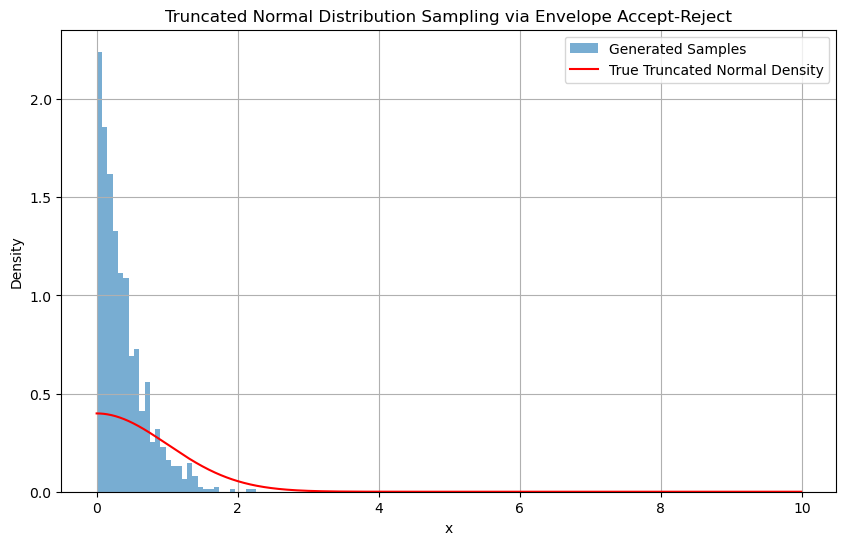

In [8]:
import random
import math
import matplotlib.pyplot as plt

# Define the truncated normal density function
def truncated_normal_density(x, mu=0, sigma=1):
    return math.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * math.sqrt(2 * math.pi))

# Define the translated exponential density function
def translated_exponential_density(x, alpha, mu=0):
    return alpha * math.exp(-alpha * (x - mu)) if x >= mu else 0

# Optimized alpha for the translated exponential
def optimized_alpha(mu):
    return mu + math.sqrt(mu**2 + 4)

# Accept-Reject Algorithm
def truncated_normal_sample(mu=0, sigma=1, a=0, n_samples=1000):
    alpha = optimized_alpha(mu)
    samples = []
    M = math.exp(alpha**2 / 2 - alpha * mu)  # Bound for acceptance
    while len(samples) < n_samples:
        # Generate Y ~ Exp(alpha, mu)
        Y = mu + (-1 / alpha) * math.log(random.uniform(0, 1))
        # Generate U ~ Uniform(0, 1)
        U = random.uniform(0, 1)
        # Check acceptance criterion
        if U <= math.exp(-Y**2 / 2) / M:
            samples.append(Y)
    return samples

# Parameters for the truncated normal
mu = 0  # Mean
sigma = 1  # Standard deviation
a = 0  # Truncation point
n_samples = 1000  # Number of samples

# Generate samples
samples = truncated_normal_sample(mu=mu, sigma=sigma, a=a, n_samples=n_samples)

# Plot results
x_values = [a + i * 0.01 for i in range(1000)]
true_density = [truncated_normal_density(x, mu, sigma) if x >= a else 0 for x in x_values]
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, label="Generated Samples")
plt.plot(x_values, true_density, label="True Truncated Normal Density", color="red")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Truncated Normal Distribution Sampling via Envelope Accept-Reject")
plt.legend()
plt.grid()
plt.show()


## Example : Poisson Variables from Logistic Variables

In this example, we describe an efficient method for simulating a Poisson distribution $ P(\lambda) $ using the relationship between the Poisson distribution and the logistic distribution. The Poisson distribution can be simulated using a logistic distribution, as proposed by Atkinson (1979). The logistic distribution has the following properties:

### Logistic Distribution

- **Density Function**:
  
  $$
  f(x) = \frac{1}{\beta \left[ 1 + \exp\left(-\frac{x - a}{\beta}\right) \right]},
  $$
  where $ a $ is the location parameter and $ \beta $ is the scale parameter.

- **Cumulative Distribution Function**:
  
  $$
  F(x) = \frac{1}{1 + \exp\left(-\frac{x - a}{\beta}\right)}.
  $$

The logistic distribution is analytically invertible.

### Poisson Distribution from Logistic

We aim to simulate a Poisson-distributed random variable $ N \sim P(\lambda) $ using the logistic distribution. The idea is to relate the continuous and discrete distributions by defining $ N = \left\lfloor z + 0.5 \right\rfloor $, the integer part of $ z + 0.5 $.

The range of the logistic distribution is $ (-\infty, \infty) $, but to better match the Poisson, we restrict the range to $ [-1/2, \infty) $.

Thus, the random variable $ N $ has the distribution function:

$$
P(N = n) = \frac{1}{1 + \exp\left(-\frac{n - 0.5 - a}{\beta}\right)} \quad \text{for} \quad -1/2 < n < 1/2,
$$

and the ratio of densities is given by:

$$
\frac{f(x)}{P(N = n)} = \frac{e^{n!}}{1 + \exp\left(-\frac{0.5 + a}{\beta}\right)}.
$$

### Optimization of Parameters

Atkinson (1979) proposed the following choices for $ a $ and $ \beta $ that match the first two moments of the logistic distribution with the Poisson distribution:

- $ a = \lambda $
- $ \beta = \frac{\lambda}{\sqrt{3}} $

This choice leads to a bound $ c = 0.767 - \frac{3.36}{\lambda} $, and thus the resulting algorithm is based on this optimization.

---

### Algorithm A.6: Atkinson's Poisson Simulation

1. **Define Parameters**: 
   - Set $ \beta = \frac{\lambda}{\sqrt{3}} $, $ a = \lambda $, and $ k = \log(c) - \log(\lambda) - \log(\beta) $.
   
2. **Generate $ X $**:
   - Generate a uniform random variable $ U $, and compute:
   
   $$
   X = \frac{a - \log\left(\frac{1 - U}{1}\right)}{\beta}.
   $$

   Continue until $ X \geq 0.5 $.

3. **Compute $ N $**:
   - Set $ N = \left\lfloor X + 0.5 \right\rfloor $.
   
4. **Acceptance Criterion**:
   - Accept $ N $ from the Poisson distribution if:
   
   $$
   a - f_z + \log \left(\frac{U}{1 + \exp(a - B X)}\right) < k + N \log(\log N).
   $$
   
5. **Repeat** until a valid Poisson sample is generated.


In [9]:
import math
import random

# Function to generate Poisson distributed random variable using Atkinson's method
def generate_poisson_logistic(lambda_val):
    # Step 1: Define parameters
    beta = lambda_val / math.sqrt(3)
    a = lambda_val
    c = 0.767 - 3.36 / lambda_val
    k = math.log(c) - math.log(lambda_val) - math.log(beta)
    
    # Step 2: Generate X using uniform random variable U
    while True:
        U = random.random()  # Generate a uniform random variable U
        X = (a - math.log((1 - U) / 1)) / beta  # Calculate X
        if X >= 0.5:  # Only accept X >= 0.5
            break
    
    # Step 3: Compute N (Poisson value) as the floor of X + 0.5
    N = math.floor(X + 0.5)
    
    # Step 4: Acceptance criterion
    while True:
        U = random.random()  # Generate a uniform random variable U
        f_z = a - math.log((1 - U) / 1)  # Recompute f_z for the Poisson distribution
        if f_z + math.log(U / (1 + math.exp(a - beta * X))) < k + N * math.log(math.log(N)):
            break  # Accept the Poisson value
    
    # Return the generated Poisson random variable
    return N

# Example usage:
lambda_val = 5  # Poisson parameter (mean)
poisson_value = generate_poisson_logistic(lambda_val)
print("Generated Poisson random variable:", poisson_value)


Generated Poisson random variable: 4


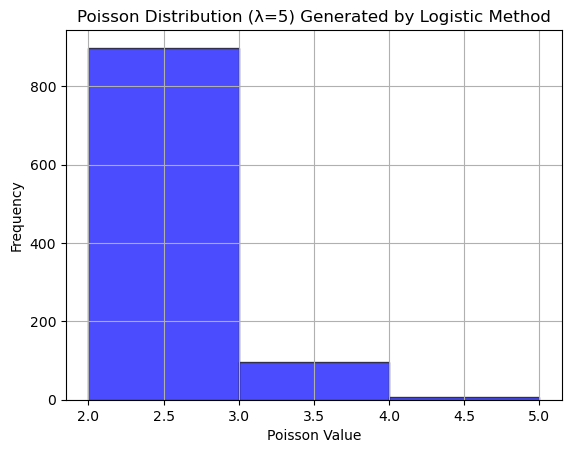

In [14]:
import math
import random
import matplotlib.pyplot as plt

# Function to generate Poisson distributed random variable using Atkinson's method
def generate_poisson_logistic(lambda_val):
    # Step 1: Define parameters
    beta = lambda_val / math.sqrt(3)
    a = lambda_val
    c = 0.767 - 3.36 / lambda_val
    k = math.log(c) - math.log(lambda_val) - math.log(beta)
    
    # Step 2: Generate X using uniform random variable U
    while True:
        U = random.random()  # Generate a uniform random variable U
        X = (a - math.log((1 - U) / 1)) / beta  # Calculate X
        if X >= 0.5:  # Only accept X >= 0.5
            break
    
    # Step 3: Compute N (Poisson value) as the floor of X + 0.5
    N = math.floor(X + 0.5)
    
    # Step 4: Acceptance criterion
    while True:
        U = random.random()  # Generate a uniform random variable U
        f_z = a - math.log((1 - U) / 1)  # Recompute f_z for the Poisson distribution
        if f_z + math.log(U / (1 + math.exp(a - beta * X))) < k + N * math.log(math.log(N)):
            break  # Accept the Poisson value
    
    # Return the generated Poisson random variable
    return N

# Generate multiple Poisson random variables
def generate_multiple_poisson(lambda_val, num_samples):
    return [generate_poisson_logistic(lambda_val) for _ in range(num_samples)]

# Example usage:
lambda_val = 5  # Poisson parameter (mean)
num_samples = 1000  # Number of Poisson random variables to generate
poisson_samples = generate_multiple_poisson(lambda_val, num_samples)

# Plot histogram of generated Poisson samples
plt.hist(poisson_samples, bins=range(min(poisson_samples), max(poisson_samples) + 2), alpha=0.7, color='blue', edgecolor='black')
plt.title(f"Poisson Distribution (λ={lambda_val}) Generated by Logistic Method")
plt.xlabel("Poisson Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
